In [ ]:
#%pip install pandas
import pandas as pd
#%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [163]:
df = pd.read_csv("sample_data.csv")

In [164]:
df.head(5)

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3]
0,Virolahti Harju,2024,3,16,11:00,22.8
1,Virolahti Harju,2024,3,16,12:00,22.4
2,Virolahti Harju,2024,3,16,13:00,23.2
3,Virolahti Harju,2024,3,16,14:00,23.7
4,Virolahti Harju,2024,3,16,15:00,25


In [165]:
df.dtypes

Havaintoasema                             object
Vuosi                                      int64
Kuukausi                                   int64
Päivä                                      int64
Aika [UTC]                                object
Hengitettävät hiukkaset <10 µm [µg/m3]    object
dtype: object

In [166]:
# Lisätään Date sarake
df["Date"] = df["Vuosi"].astype(str) + "-" + df["Kuukausi"].astype(str) + "-" +  df["Päivä"].astype(str) + " " + df["Aika [UTC]"]
df["Date"] = pd.to_datetime(df["Date"])
# Muunetaan "-" NaN arvoksi
df = df.replace('-',np.NaN)
df["Hengitettävät hiukkaset <10 µm [µg/m3]"] = df["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)
df.dtypes

Havaintoasema                                     object
Vuosi                                              int64
Kuukausi                                           int64
Päivä                                              int64
Aika [UTC]                                        object
Hengitettävät hiukkaset <10 µm [µg/m3]           float64
Date                                      datetime64[ns]
dtype: object

In [183]:
# NaN arvoja sisältävien rivien määrä
df[df["Hengitettävät hiukkaset <10 µm [µg/m3]"].isna()]

,Havaintoasema,Vuosi,Kuukausi,Päivä,Aika [UTC],Hengitettävät hiukkaset <10 µm [µg/m3],Date
350,Virolahti Harju,2024,3,31,01:00,NaN,2024-03-31 01:00:00


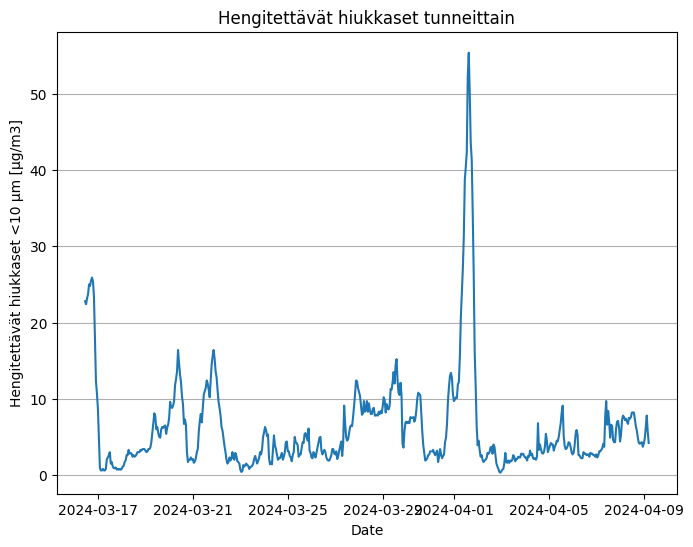

In [168]:
plt.figure(figsize=(8,6))
plt.plot(df["Date"], df["Hengitettävät hiukkaset <10 µm [µg/m3]"])
plt.title("Hengitettävät hiukkaset tunneittain")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()

In [169]:
# Tarkempia arvoja
print(f"Hengitettävien hiukkasten keskiarvo: {round(df['Hengitettävät hiukkaset <10 µm [µg/m3]'].mean(),3)} [µg/m3]")
print(f"Hengitettävien hiukkasten mediaani: {round(df['Hengitettävät hiukkaset <10 µm [µg/m3]'].median(), 3)} [µg/m3]")
print(f"Hengitettävien hiukkasten maksimiarvo: {round(df['Hengitettävät hiukkaset <10 µm [µg/m3]'].max(),3)} [µg/m3]")
print(f"Hengitettävien hiukkasten minimiarvo: {round(df['Hengitettävät hiukkaset <10 µm [µg/m3]'].min(), 3)} [µg/m3]")

Hengitettävien hiukkasten keskiarvo: 6.148 [µg/m3]
Hengitettävien hiukkasten mediaani: 3.85 [µg/m3]
Hengitettävien hiukkasten maksimiarvo: 55.4 [µg/m3]
Hengitettävien hiukkasten minimiarvo: 0.3 [µg/m3]


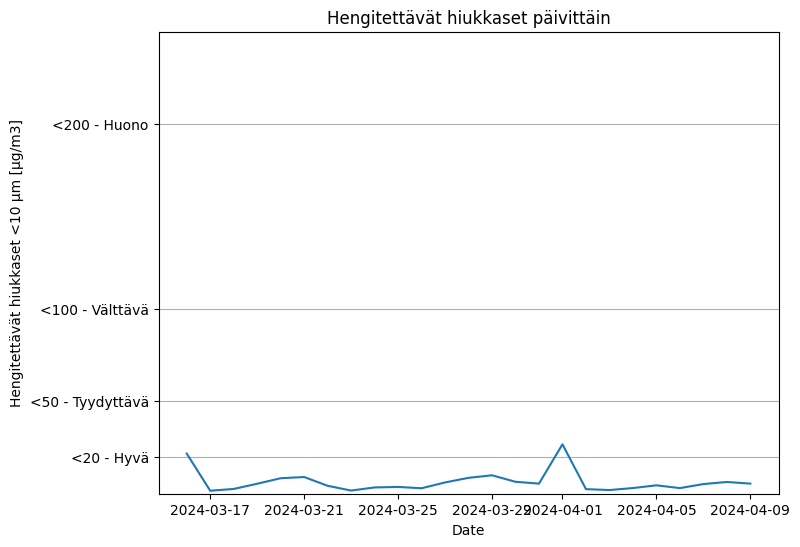

In [170]:
# Päivän keskiarvo kuvaajassa

df2 = df[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
plt.figure(figsize=(8,6))
plt.plot(df2)
plt.ylim(0,250)
plt.yticks([20,50,100,200],["<20 - Hyvä", "<50 - Tyydyttävä", "<100 - Välttävä", "<200 - Huono"])
plt.title("Hengitettävät hiukkaset päivittäin")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()

In [171]:
df2

,Hengitettävät hiukkaset <10 µm [µg/m3]
Date,
2024-03-16,21.746154
2024-03-17,1.625000
2024-03-18,2.583333
2024-03-19,5.391667
2024-03-20,8.387500
2024-03-21,9.037500
2024-03-22,4.291667
2024-03-23,1.716667
2024-03-24,3.391667


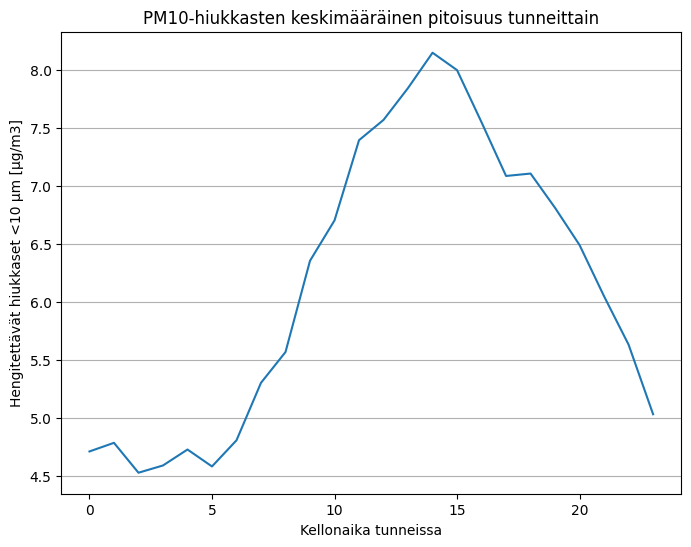

In [172]:
# Tarkastelu kellonajan mukaan
import warnings
warnings.filterwarnings('ignore')
df3 = df[["Hengitettävät hiukkaset <10 µm [µg/m3]"]]
df3["hour"] =  df.Date.dt.hour
df3 = df3.groupby(['hour']).mean()
plt.figure(figsize=(8,6))
plt.plot(df3)
plt.title("PM10-hiukkasten keskimääräinen pitoisuus tunneittain")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Kellonaika tunneissa")
plt.grid(axis='y', linestyle='-')
plt.show()


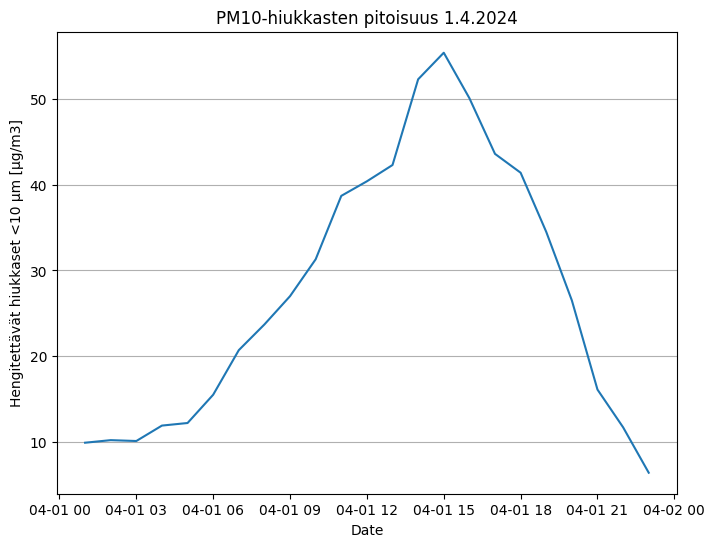

In [173]:
# Ilmanlaadun tarkastelu 1.4 (korkeimmat mittausarvot)

df4 = df[(df['Date'] > '2024-04-1 00:00') & (df['Date'] < '2024-04-01 23:59')]
plt.figure(figsize=(8,6))
plt.plot(df4["Date"], df4["Hengitettävät hiukkaset <10 µm [µg/m3]"])
plt.title("PM10-hiukkasten pitoisuus 1.4.2024")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()

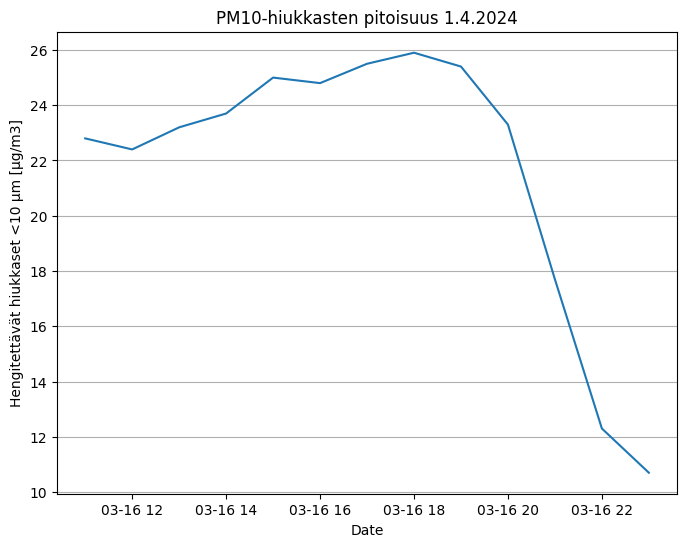

In [174]:
# Toinen korkeita arvoja sisältänyt mittauspäivä

df5 = df[(df['Date'] > '2024-03-16 00:00') & (df['Date'] < '2024-03-16 23:59')]
plt.figure(figsize=(8,6))
plt.plot(df5["Date"], df5["Hengitettävät hiukkaset <10 µm [µg/m3]"])
plt.title("PM10-hiukkasten pitoisuus 1.4.2024")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Date")
plt.grid(axis='y', linestyle='-')
plt.show()

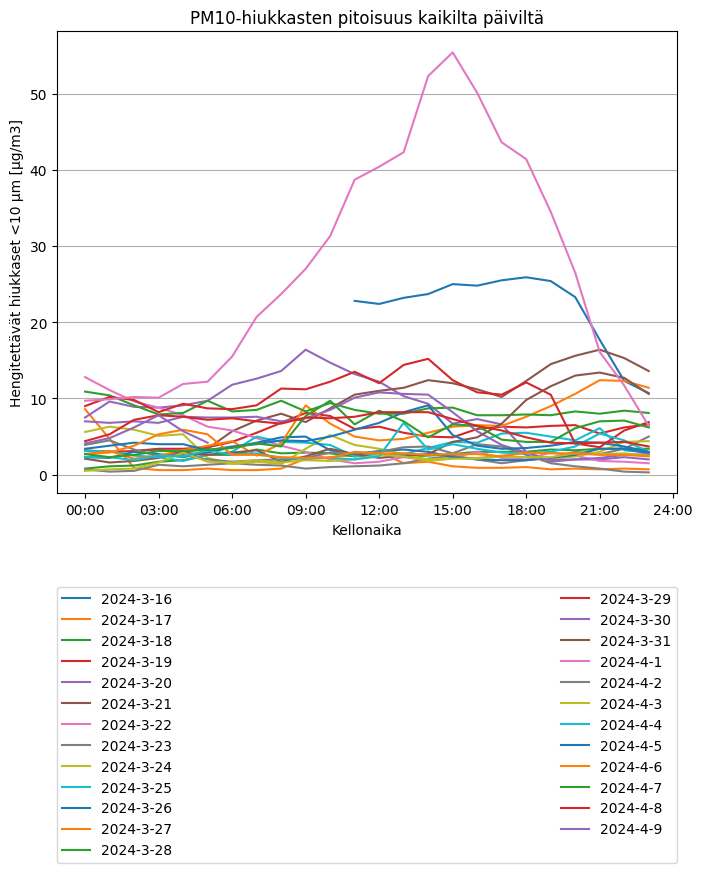

In [225]:
# Kaikkien päivien mittaustulokset tunneittain
df6 = df
df6["Paivamaara"] = df["Vuosi"].astype(str) + "-" + df["Kuukausi"].astype(str) + "-" + df["Päivä"].astype(str)


pivot_data = df6.pivot_table(index='Aika [UTC]', columns='Paivamaara', values='Hengitettävät hiukkaset <10 µm [µg/m3]')
plt.figure(figsize=(8,6))
plt.plot(pivot_data)
plt.title("PM10-hiukkasten pitoisuus kaikilta päiviltä")
plt.ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
plt.xlabel("Kellonaika")
plt.xticks(["00:00","03:00", "06:00", "09:00", "12:00", "15:00", "18:00", "21:00", "24:00"])
plt.grid(axis='y', linestyle='-')
plt.legend(pivot_data, bbox_to_anchor=(0., -0.8, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)
plt.show()

Index(['2024-3-16', '2024-3-17', '2024-3-18', '2024-3-19', '2024-3-20',
       '2024-3-21', '2024-3-22', '2024-3-23', '2024-3-24', '2024-3-25',
       '2024-3-26', '2024-3-27', '2024-3-28', '2024-3-29', '2024-3-30',
       '2024-3-31', '2024-4-1', '2024-4-2', '2024-4-3', '2024-4-4', '2024-4-5',
       '2024-4-6', '2024-4-7', '2024-4-8', '2024-4-9'],
      dtype='object', name='Paivamaara')